In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Sample size
n = 5000


In [3]:
x = np.cumsum(np.random.randn(n))
y = np.cumsum(np.random.randn(n))
# assume the constant in front is 1

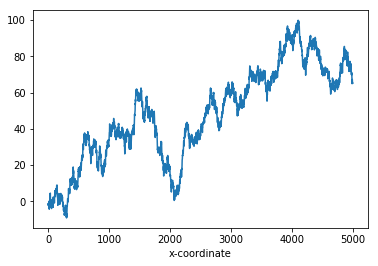

In [4]:
plt.plot(x)
plt.xlabel('x-coordinate')
plt.show()

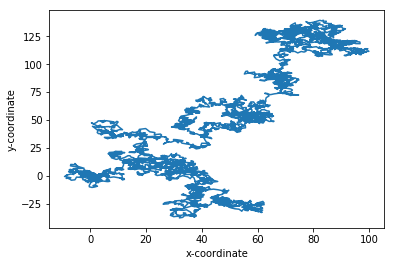

In [5]:
plt.plot(x,y)
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

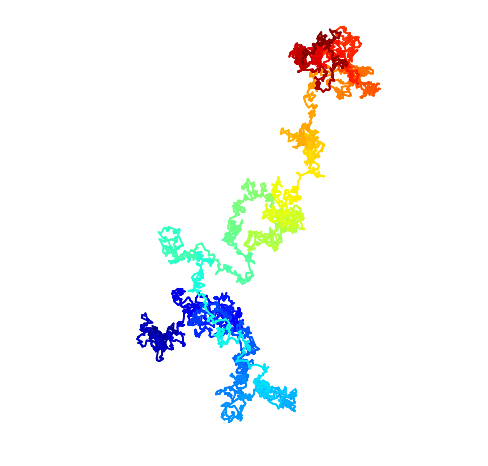

In [6]:
# Nice plot of Brownian motion
# We add 10 intermediary points between two
# successive points. We interpolate x and y.
k = 10
x2 = np.interp(np.arange(n * k), np.arange(n) * k, x)
y2 = np.interp(np.arange(n * k), np.arange(n) * k, y)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# Now, we draw our points with a gradient of colors.
ax.scatter(x2, y2, c=range(n * k), linewidths=0,
           marker='o', s=3, cmap=plt.cm.jet,)
ax.axis('equal')
ax.set_axis_off()

In [9]:
# Velocity model simulation
def CVM(Tmax,beta,sigma,v0,dt):
    T = np.arange(0,Tmax,dt)
    n = len(T)
    V = n*[0]
    V[0] = v0 # set the initial value if you want to start with a different value rather than 0
    dW = np.random.randn(n)*np.sqrt(dt) + 1j *np.random.randn(n)*np.sqrt(dt)# 2d motion 
    for i in range(1,n-1):
        V[i] = V[i-1] - beta*V[i-1] * dt  + sigma *dW[i] # same form as in Blackwell paper, where the mean is 0
    Z = np.cumsum(V)* dt
    return(Z)
        



In [10]:
n=CVM(10000,1,1,0,0.1)

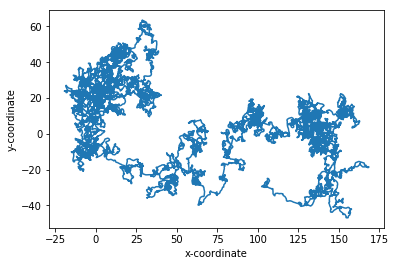

In [11]:
plt.plot(n.real,n.imag)
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

In [12]:
len(n)

100000

In [13]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

In [14]:
# autocorr for brownian motion
brownian_autocorr= autocorr(x)

In [15]:
brownian_autocorr

array([ 1.48078914e+07,  1.48032743e+07,  1.47987266e+07, ...,
       -3.46774243e+02, -1.94365419e+02, -1.03469166e+02])

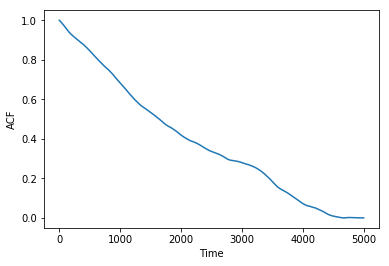

In [16]:
#Normalized autocorr
plt.plot(brownian_autocorr/float(brownian_autocorr.max()))
plt.xlabel("Time")
plt.ylabel('ACF')
plt.show()

In [17]:
velocity_autocorr= autocorr(n.real)

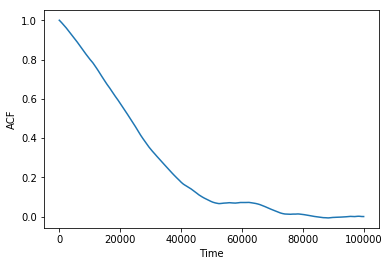

In [18]:
plt.plot(velocity_autocorr/float(velocity_autocorr.max()))
plt.xlabel('Time')
plt.ylabel('ACF')
plt.show()

In [19]:
velocity_autocorr_img_part= autocorr(n.imag)

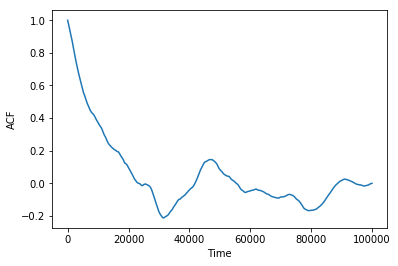

In [20]:
plt.plot(velocity_autocorr_img_part/ float(velocity_autocorr_img_part.max()))
plt.xlabel('Time')
plt.ylabel('ACF')
plt.show()

In [ ]:
# Simulate the velocity model: R code 
CVM <- function(Tmax, tau, beta=1, v0, dt)
{
  T <- seq(0,Tmax,dt)
  n <- length(T)
  V <- T*0
  dW <- (rnorm(n) + 1i*rnorm(n))*sqrt(dt)
  V[1] <- v0
  for(i in 2:n)
      V[i] <-  V[i-1] - V[i-1] * dt/tau + beta * dW[i]              
  Z <- cumsum(V)*dt
  return(Z)
}


